<a href="https://colab.research.google.com/github/Gowr93/Project_Repository_GowriCS/blob/main/E_Commerce_PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E-Commerce Dataset

# Data Set Overview

The dataset contains 60,000 rows with 51 columns including:



1.   User information
2.   Product Details
3.   User_Product Interaction


#Goal:

Building a model to predict whether a user will purchase a product based on purchase history


## DATA PREPARATION

IMPORTING REQUIRED LIBRARIES

In [1]:
#Importing warnings
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Loading the dataset

e_comm = pd.read_csv('/content/ecommerce_recommendation_dataset.csv')

In [4]:
# Printing the number of Rows and Columns
print("The number of Rows : {} ".format(e_comm.shape[0]))
print("The number of Columns : {} ".format(e_comm.shape[1]))

The number of Rows : 60000 
The number of Columns : 51 


In [5]:
# Displaying the Datatypes in Dataset
e_comm.dtypes

,0
user_id,int64
product_id,int64
category,object
price,float64
rating,int64
review_count,int64
user_age,int64
user_gender,object
user_location,object
purchase_history,bool


In [6]:
# Review the Structure of the dataset
e_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  60000 non-null  int64  
 1   product_id               60000 non-null  int64  
 2   category                 60000 non-null  object 
 3   price                    60000 non-null  float64
 4   rating                   60000 non-null  int64  
 5   review_count             60000 non-null  int64  
 6   user_age                 60000 non-null  int64  
 7   user_gender              60000 non-null  object 
 8   user_location            60000 non-null  object 
 9   purchase_history         60000 non-null  bool   
 10  time_on_page             60000 non-null  float64
 11  add_to_cart_count        60000 non-null  int64  
 12  search_keywords          60000 non-null  object 
 13  discount_applied         60000 non-null  bool   
 14  user_membership       

In [7]:
#To view the structure of the dataset

e_comm.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,0.13,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.02,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,1.55,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,1.41,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,1.29,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66


In [8]:
# Checking the Descriptive Statistics summary

e_comm.describe()

,user_id,product_id,price,rating,review_count,user_age,time_on_page,add_to_cart_count,session_duration,clicks_on_ads,...,time_to_purchase,delivery_time,shipping_fee,seller_rating,seller_response_time,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,product_popularity
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,50109.404617,2491.198100,502.938655,2.996383,250.173567,43.425617,15.221682,4.498617,1797.510736,9.506933,...,150.047750,7.996907,25.010656,3.001217,36.544411,0.996772,-0.000710,0.499817,0.500185,0.501787
std,28913.382290,1441.522417,288.082193,1.415970,144.807302,14.995046,8.485544,2.863739,1037.231985,5.771029,...,86.313955,4.039380,14.451148,1.412710,20.527944,0.576923,0.579466,0.289040,0.289875,0.288986
min,1.000000,1.000000,5.010000,1.000000,0.000000,18.000000,0.500000,0.000000,1.030000,0.000000,...,1.010000,1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,25022.500000,1245.000000,252.802500,2.000000,124.000000,30.000000,7.910000,2.000000,901.792500,5.000000,...,74.967500,4.510000,12.470000,2.000000,18.850000,0.500000,-0.500000,0.250000,0.250000,0.250000
50%,50208.500000,2481.500000,504.355000,3.000000,251.000000,43.000000,15.170000,5.000000,1798.315000,10.000000,...,149.980000,7.990000,25.070000,3.000000,36.520000,0.990000,0.000000,0.500000,0.500000,0.500000
75%,75141.500000,3731.000000,752.592500,4.000000,375.000000,56.000000,22.562500,7.000000,2692.330000,15.000000,...,224.680000,11.490000,37.530000,4.000000,54.380000,1.500000,0.500000,0.750000,0.750000,0.750000
max,99997.000000,4999.000000,999.990000,5.000000,499.000000,69.000000,30.000000,9.000000,3599.970000,19.000000,...,300.000000,15.000000,50.000000,5.000000,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000


NUMBER OF FEATURES

In [9]:
#Looping to find the number of Numerical data and Categorical data

num,obj = 0,0

for cols in e_comm.columns:
  if e_comm.dtypes[cols] != 'O':
    num += 1
  else:
    obj += 1
print(" The number of numerical value is {}".format(num))
print(" The number of categorical value is {}".format(obj))

 The number of numerical value is 31
 The number of categorical value is 20


CHECKING FOR MISSING DATA AND DUPLICATES IN THE DATASET

In [10]:
print(f"The missing data in the dataset is : \n {e_comm.isnull().sum()}")
print("=" *50)
print(f"The duplicate data in the dataset is : \n {e_comm.duplicated().sum()}")


The missing data in the dataset is : 
 user_id                    0
product_id                 0
category                   0
price                      0
rating                     0
review_count               0
user_age                   0
user_gender                0
user_location              0
purchase_history           0
time_on_page               0
add_to_cart_count          0
search_keywords            0
discount_applied           0
user_membership            0
user_browser               0
user_device                0
purchase_time              0
session_duration           0
clicks_on_ads              0
page_views                 0
referral_source            0
wishlist_additions         0
cart_abandonment_rate      0
average_spent              0
user_income                0
user_education             0
user_marital_status        0
product_availability       0
stock_status               0
product_return_rate        0
product_color              0
product_size               0
is_t

ANALYSING THE TARGET VARIABLE

In [11]:
# From the dataset given : ['purchase_history']
print(f" The Values in ['purchase_history'] \n" ,e_comm['purchase_history'].unique())
print("*" * 25)
print(f" The Count of ['purchase_history'] \n " ,e_comm['purchase_history'].value_counts())
print("*" * 25)
print(f" Fractions(Proportions) of the class distribution of ['purchae_history'] \n", e_comm['purchase_history'].value_counts(normalize = True))

 The Values in ['purchase_history'] 
 [False  True]
*************************
 The Count of ['purchase_history'] 
  purchase_history
True     30088
False    29912
Name: count, dtype: int64
*************************
 Fractions(Proportions) of the class distribution of ['purchae_history'] 
 purchase_history
True     0.501467
False    0.498533
Name: proportion, dtype: float64


FEATURE SELECTION

In [12]:
e_comm.columns

Index(['user_id', 'product_id', 'category', 'price', 'rating', 'review_count',
       'user_age', 'user_gender', 'user_location', 'purchase_history',
       'time_on_page', 'add_to_cart_count', 'search_keywords',
       'discount_applied', 'user_membership', 'user_browser', 'user_device',
       'purchase_time', 'session_duration', 'clicks_on_ads', 'page_views',
       'referral_source', 'wishlist_additions', 'cart_abandonment_rate',
       'average_spent', 'user_income', 'user_education', 'user_marital_status',
       'product_availability', 'stock_status', 'product_return_rate',
       'product_color', 'product_size', 'is_top_seller', 'discount_percentage',
       'time_to_purchase', 'delivery_time', 'shipping_fee', 'seller_rating',
       'seller_response_time', 'seller_location', 'product_rating_variance',
       'review_sentiment_score', 'user_engagement_score', 'ad_click_rate',
       'time_of_day', 'day_of_week', 'season', 'payment_method', 'coupon_used',
       'product_popular

In [13]:
# Dropping Identifiers

e_comm.drop(columns = ['user_id','product_id'])

,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,time_on_page,add_to_cart_count,...,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,Books,842.23,2,155,24,Other,Urban,False,13.86,6,...,0.13,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,Books,253.76,3,331,43,Other,Suburban,False,13.03,3,...,0.02,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,Books,483.65,2,236,64,Female,Rural,True,3.75,7,...,1.55,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,Groceries,459.37,2,227,34,Female,Urban,False,6.01,0,...,1.41,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,Groceries,150.11,2,214,51,Female,Urban,True,6.89,9,...,1.29,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,Electronics,700.93,3,266,67,Female,Urban,False,21.75,8,...,0.04,-0.14,0.35,0.84,Evening,Wednesday,Summer,PayPal,True,0.48
59996,Books,80.89,2,52,43,Other,Rural,True,9.23,3,...,1.06,-0.94,0.80,0.33,Night,Sunday,Fall,Debit Card,False,0.57
59997,Books,485.10,5,452,54,Male,Rural,False,26.95,6,...,0.13,-0.01,0.28,0.49,Morning,Wednesday,Summer,PayPal,False,0.03
59998,Furniture,915.42,3,386,60,Female,Suburban,False,11.63,0,...,0.80,-0.82,0.40,0.09,Evening,Tuesday,Summer,Debit Card,False,0.54


IDENTIFYING THE FEATURE TYPES(NUMERICAL AND CATEGORICAL)

In [14]:
# NUMERICAL FEATURES ---> NUMERICAL COLUMNS
num_features = e_comm.select_dtypes(include = ['int64','float64']).columns
print(f" The Numerical Features are : \n {num_features}")

 The Numerical Features are : 
 Index(['user_id', 'product_id', 'price', 'rating', 'review_count', 'user_age',
       'time_on_page', 'add_to_cart_count', 'session_duration',
       'clicks_on_ads', 'page_views', 'wishlist_additions',
       'cart_abandonment_rate', 'average_spent', 'user_income',
       'product_return_rate', 'discount_percentage', 'time_to_purchase',
       'delivery_time', 'shipping_fee', 'seller_rating',
       'seller_response_time', 'product_rating_variance',
       'review_sentiment_score', 'user_engagement_score', 'ad_click_rate',
       'product_popularity'],
      dtype='object')


In [15]:
# CATEGORICAL FEATURES ---> CATEGORICAL COLUMNS

cat_features = e_comm.select_dtypes(include = ['object']).columns
print(f" The Categorical Features are : \n {cat_features}")

 The Categorical Features are : 
 Index(['category', 'user_gender', 'user_location', 'search_keywords',
       'user_membership', 'user_browser', 'user_device', 'purchase_time',
       'referral_source', 'user_education', 'user_marital_status',
       'product_availability', 'stock_status', 'product_color', 'product_size',
       'seller_location', 'time_of_day', 'day_of_week', 'season',
       'payment_method'],
      dtype='object')


DATE TIME FEATURES / EXTRACT TIME FEATURES

In [16]:
# To display the date feature in the dataset
e_comm['purchase_time']

,purchase_time
0,2024-08-16 10:00:00
1,2024-07-16 23:00:00
2,2024-09-27 15:00:00
3,2024-09-20 22:00:00
4,2024-09-01 20:00:00
...,...
59995,2024-10-10 16:00:00
59996,2024-12-29 01:00:00
59997,2024-12-08 05:00:00
59998,2024-12-20 17:00:00


In [17]:
e_comm["purchase_time"] = pd.to_datetime(e_comm["purchase_time"])
e_comm["purchase_hour"] = e_comm["purchase_time"].dt.hour # Extract hour
e_comm["purchase_dayofweek"] = e_comm["purchase_time"].dt.dayofweek # Extract day
e_comm["purchase_month"] = e_comm["purchase_time"].dt.month # extract month

## EXPLORATORY DATA ANALYSIS

TARGET VARIABLE ANALYSIS

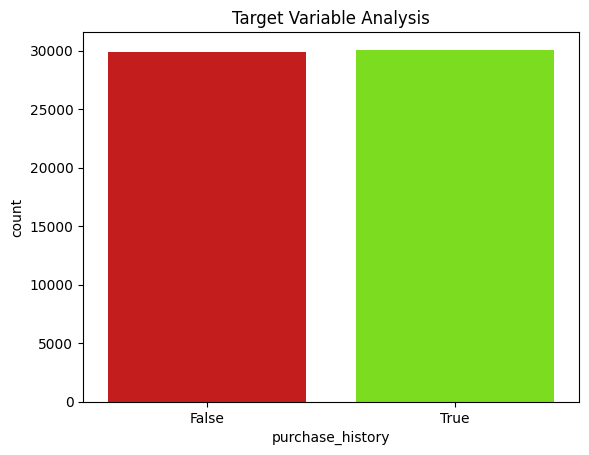

In [18]:
sns.countplot(x = 'purchase_history', data = e_comm, palette= ["#DF0101","#7CFC00"])
plt.title("Target Variable Analysis")
plt.show()

NUMERICAL FEATURES ANALYSIS

HISTOGRAM FOR DISTRIBUTION AND OUTLIERS AND SKEWNESS

=============Numerical Features Visualization =============


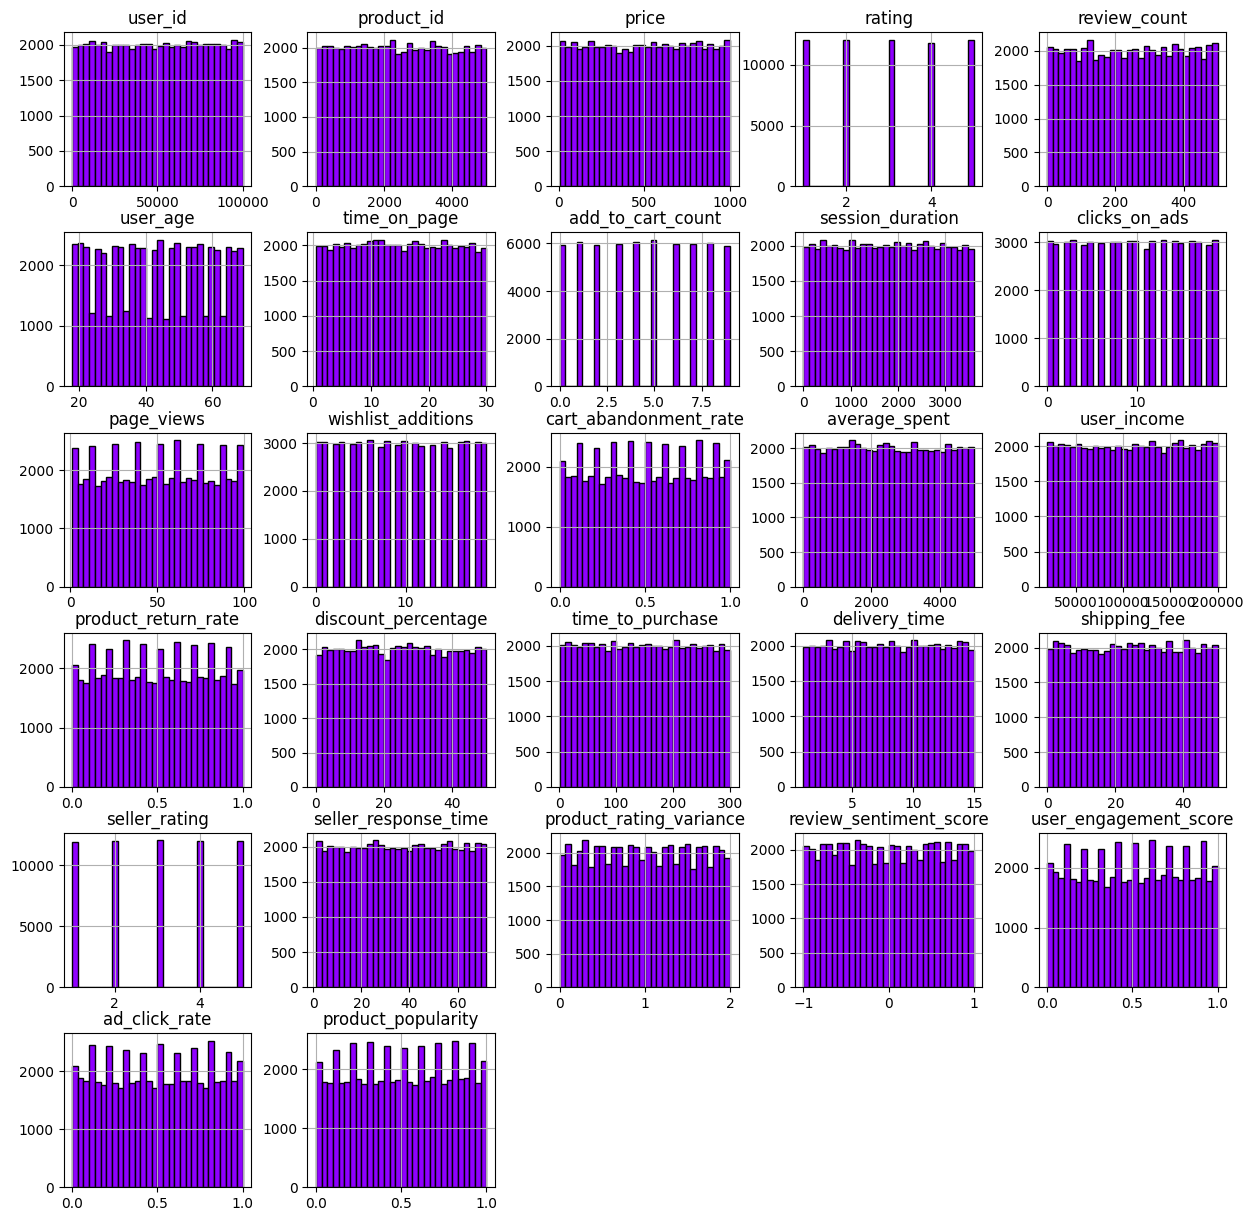

Index(['user_id', 'product_id', 'price', 'rating', 'review_count', 'user_age',
       'time_on_page', 'add_to_cart_count', 'session_duration',
       'clicks_on_ads', 'page_views', 'wishlist_additions',
       'cart_abandonment_rate', 'average_spent', 'user_income',
       'product_return_rate', 'discount_percentage', 'time_to_purchase',
       'delivery_time', 'shipping_fee', 'seller_rating',
       'seller_response_time', 'product_rating_variance',
       'review_sentiment_score', 'user_engagement_score', 'ad_click_rate',
       'product_popularity'],
      dtype='object') | Skewness: user_id                   -0.01
product_id                 0.01
price                     -0.00
rating                     0.01
review_count              -0.01
user_age                   0.00
time_on_page               0.01
add_to_cart_count         -0.00
session_duration           0.00
clicks_on_ads             -0.00
page_views                -0.00
wishlist_additions         0.00
cart_abandonment_rate 

In [19]:
# Displaying the numerical features
print("=============Numerical Features Visualization =============")
e_comm[num_features].hist(bins = 30 , figsize =(15,15),color = '#8F00FF' , edgecolor = 'black')
plt.show()

print(f"{num_features} | Skewness: {round(e_comm[num_features].skew(), 2)}")

CORRELATION HEATMAP

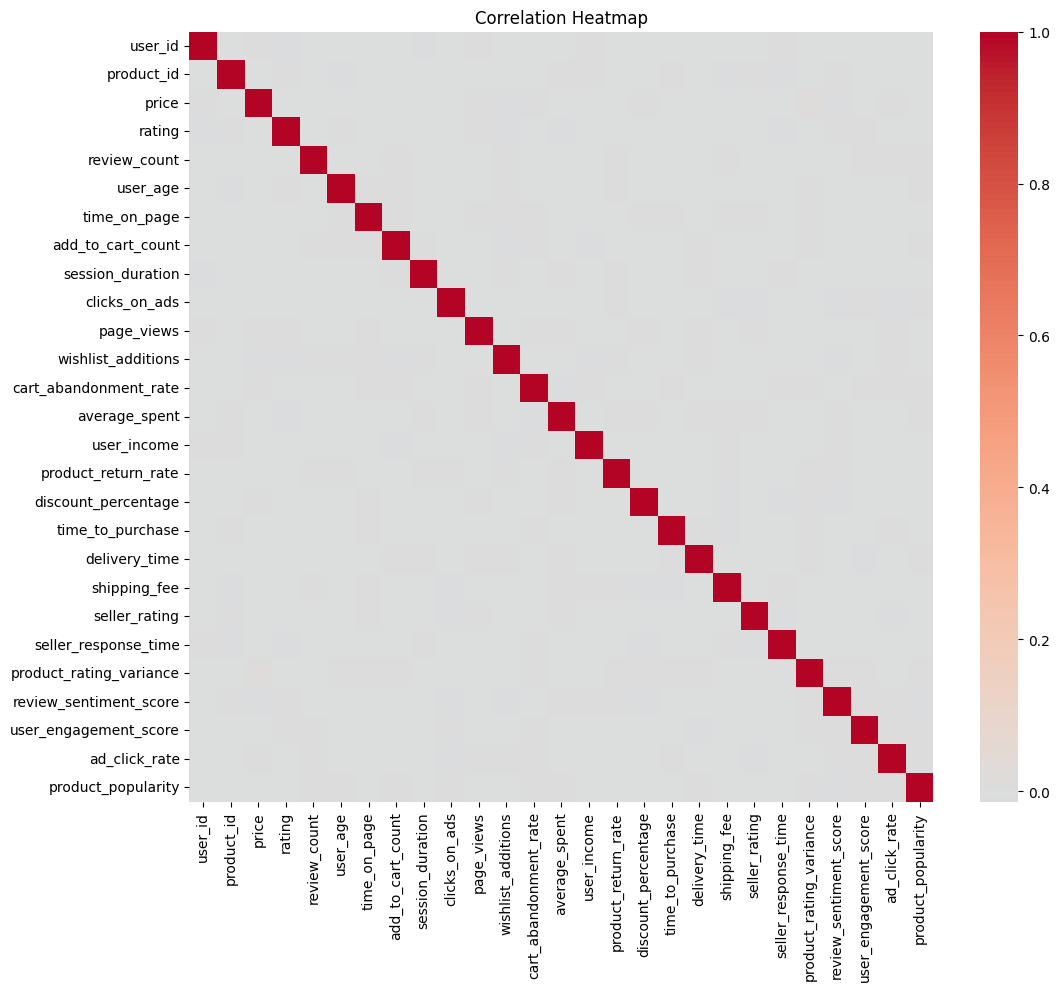

In [20]:
# Displaying the Correlation matrix

plt.figure(figsize = (12,10))
sns.heatmap(e_comm[num_features].corr(), cmap = "coolwarm", center = 0)
plt.title("Correlation Heatmap")
plt.show()

CATEGORICAL FEATURE ANALYSIS

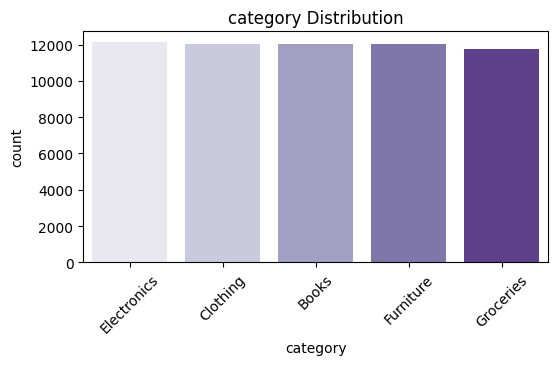

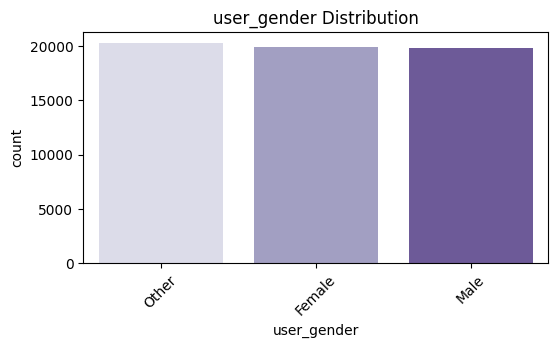

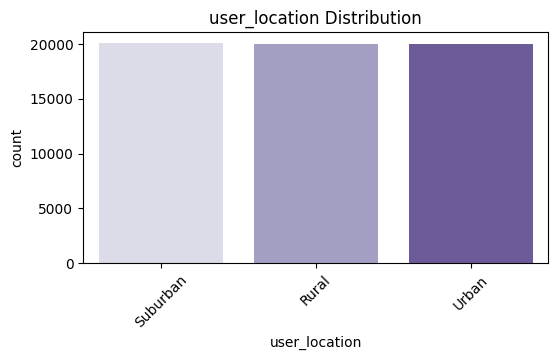

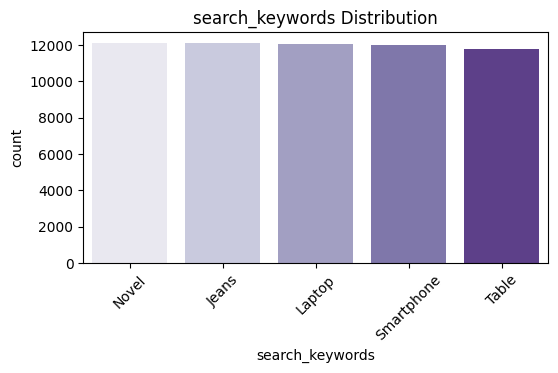

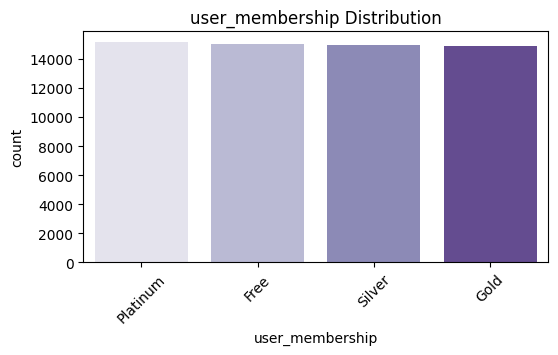

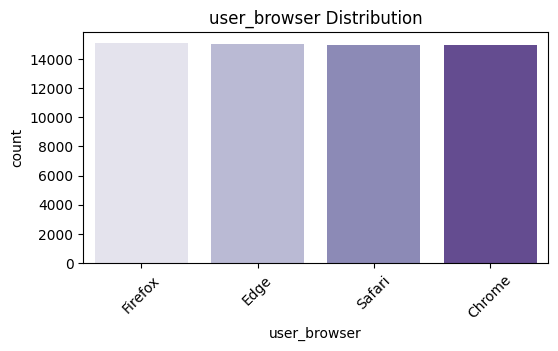

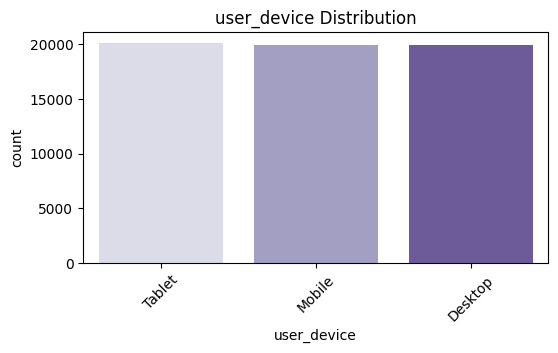

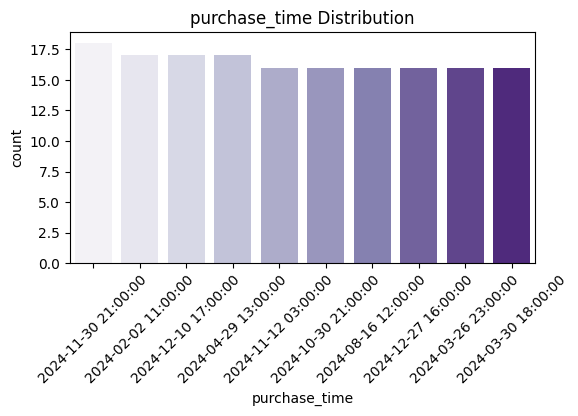

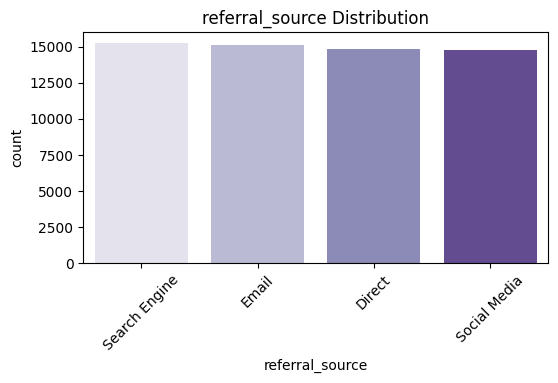

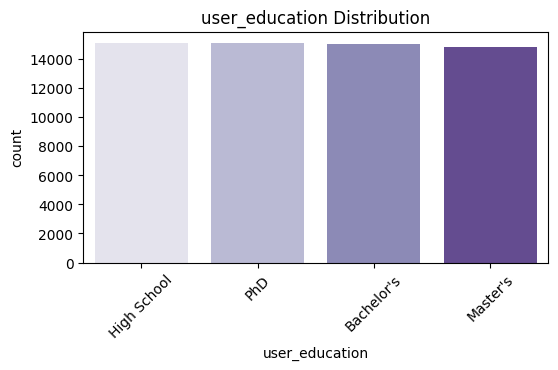

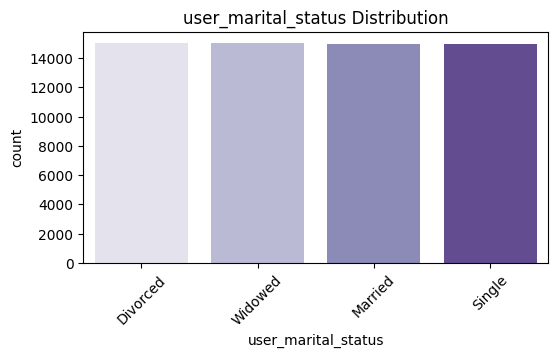

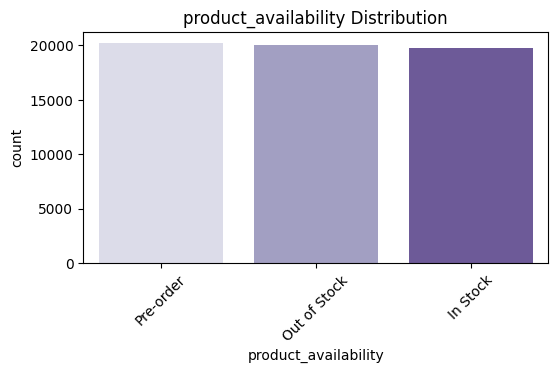

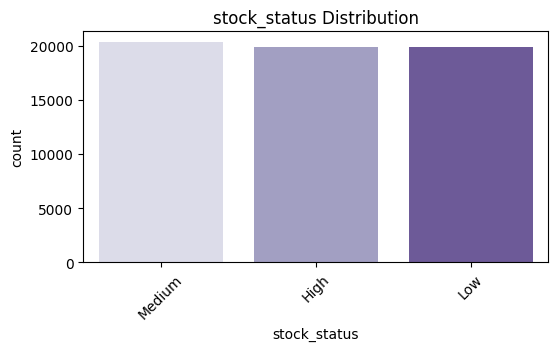

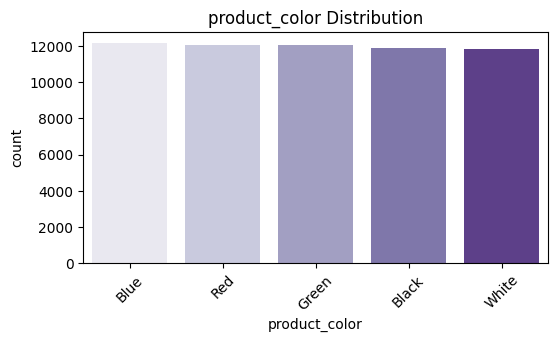

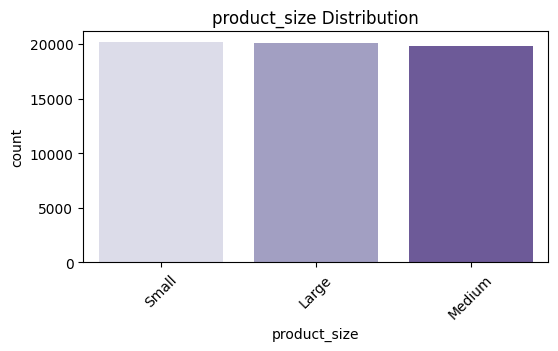

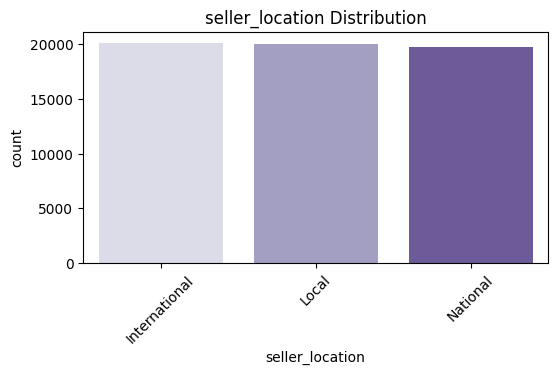

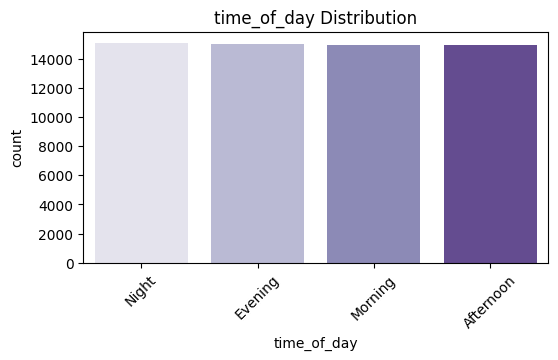

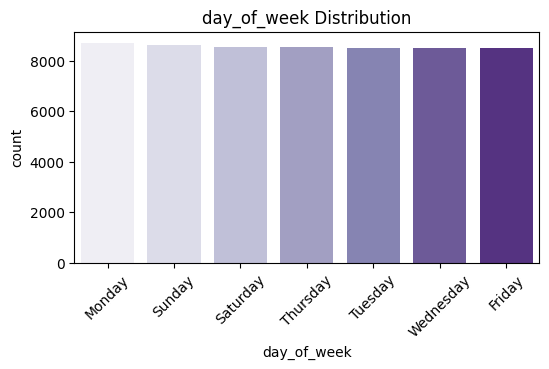

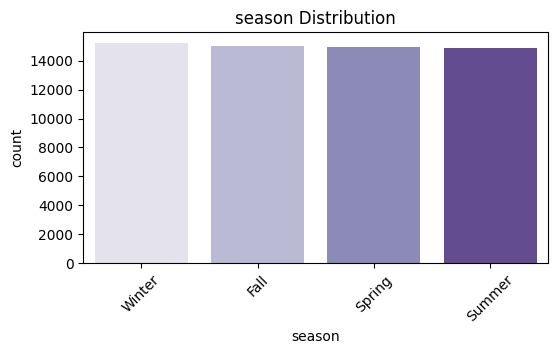

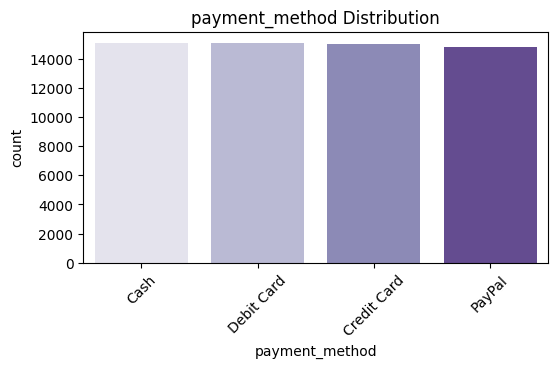

In [21]:
# To check frequency Distribution, Spotting rare categories that may need grouping

for col in cat_features:
  plt.figure(figsize = (6,3))
  sns.countplot(x = col, data = e_comm, order = e_comm[col].value_counts().index[:10], palette = "Purples")
  plt.title(f"{col} Distribution")
  plt.xticks(rotation = 45)
  plt.show()

RELATIONSHIP WITH TARGET(['purchase_history'])

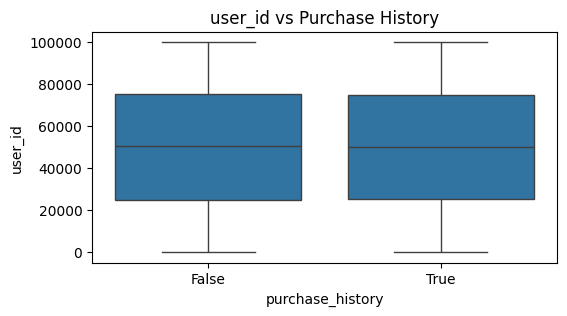

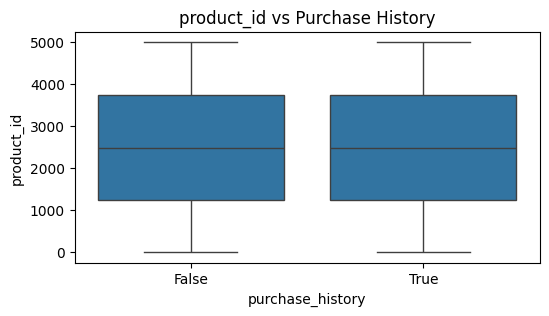

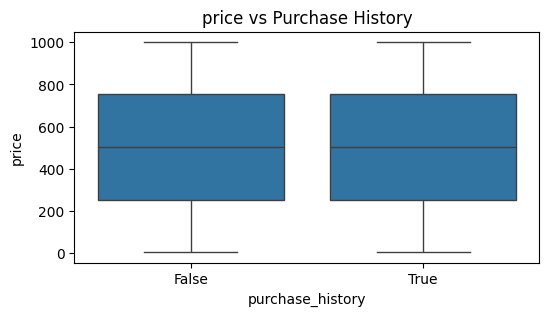

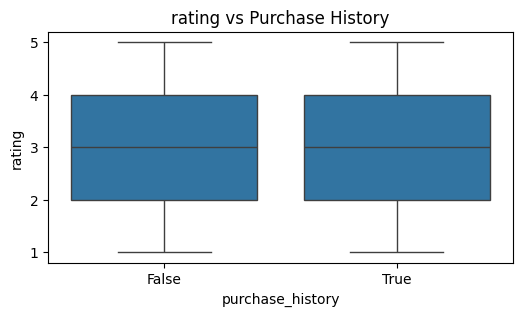

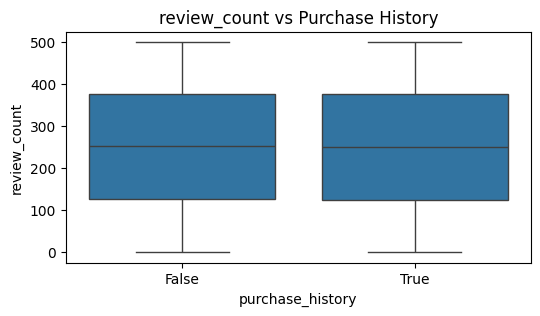

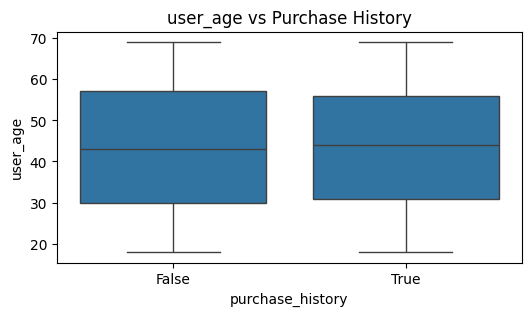

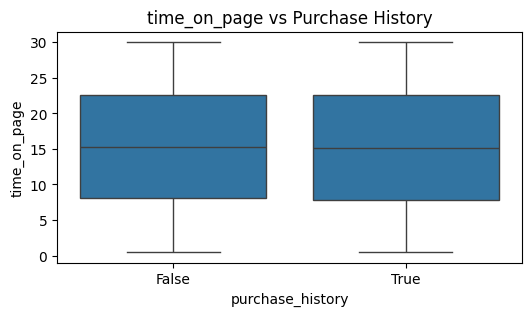

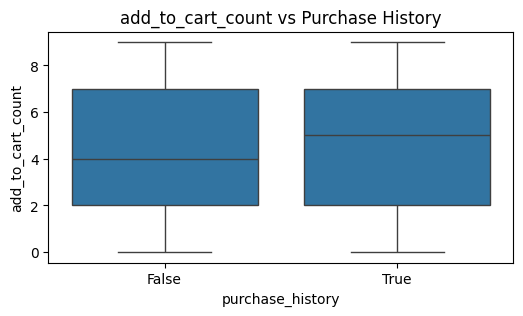

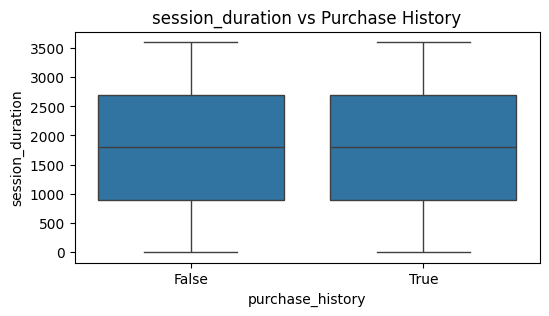

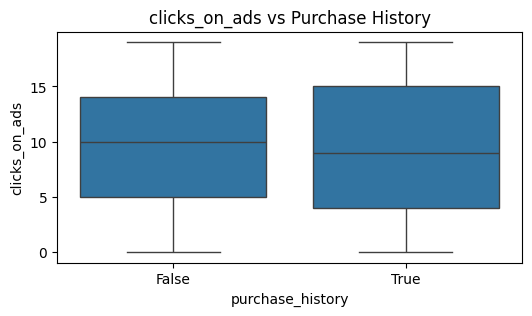

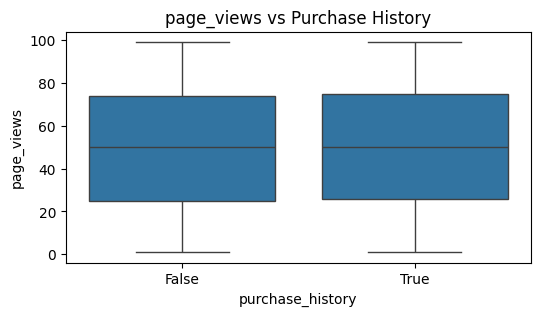

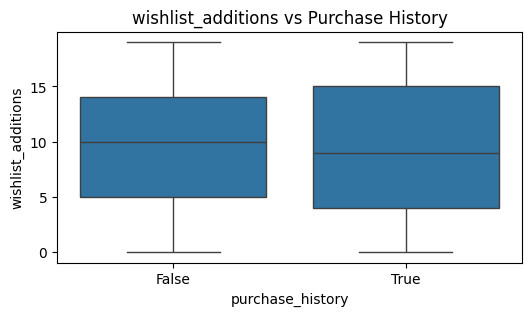

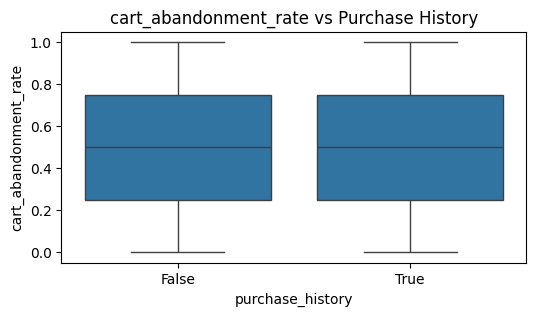

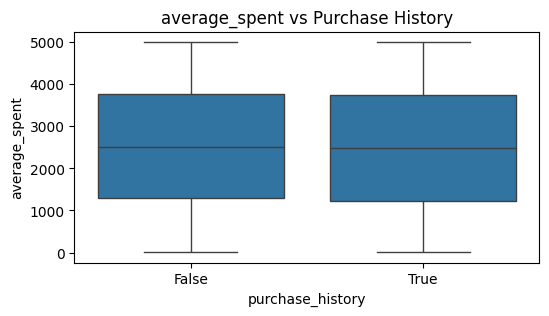

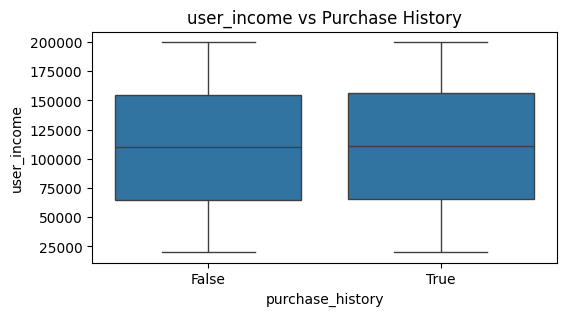

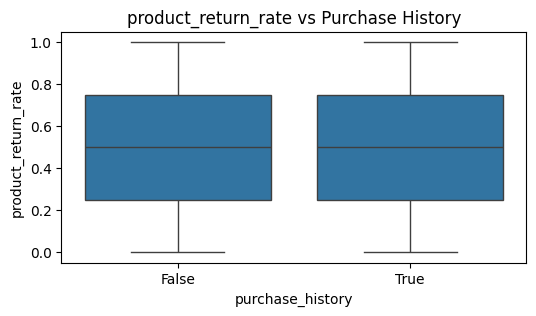

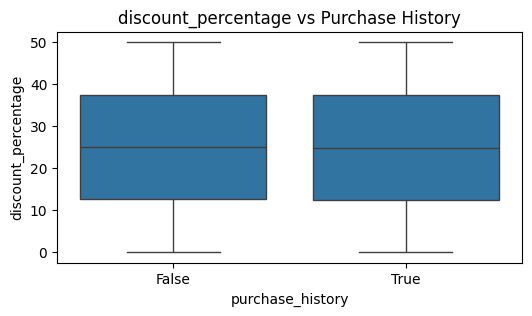

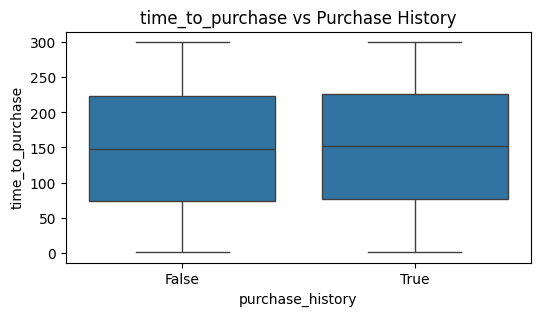

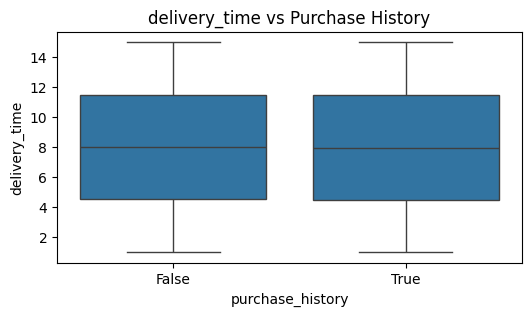

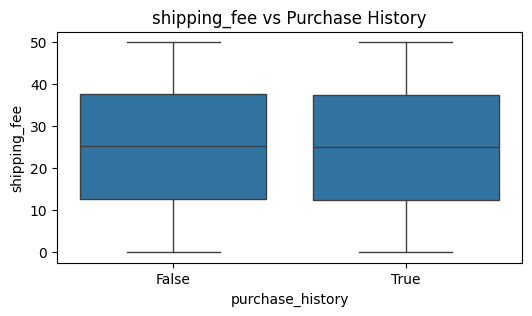

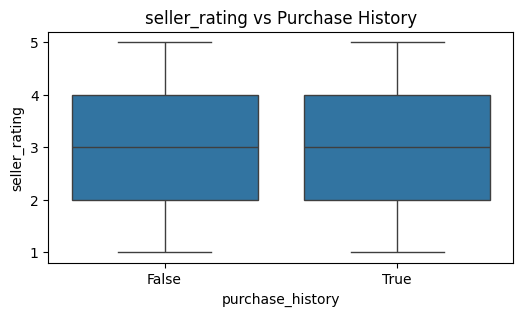

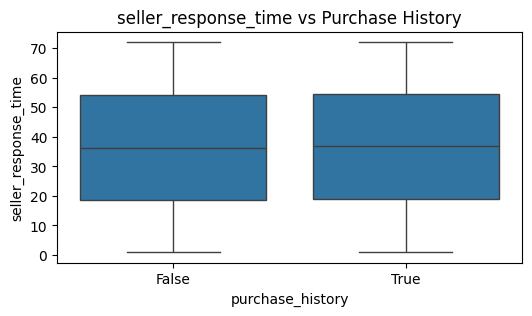

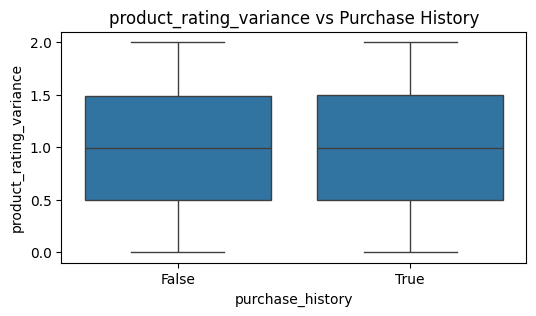

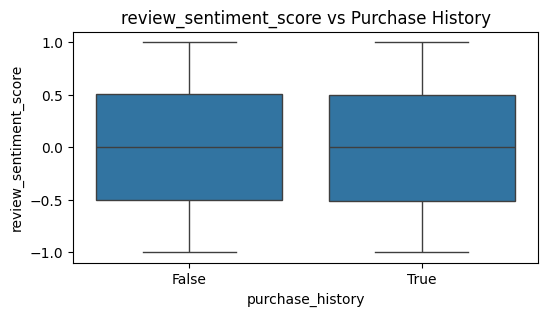

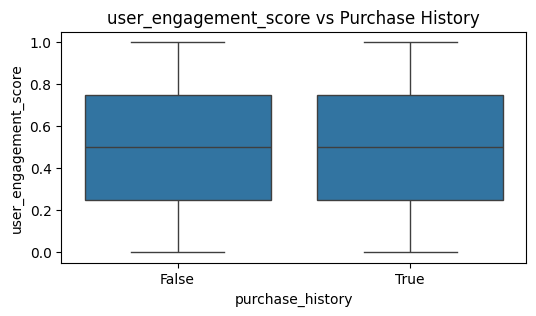

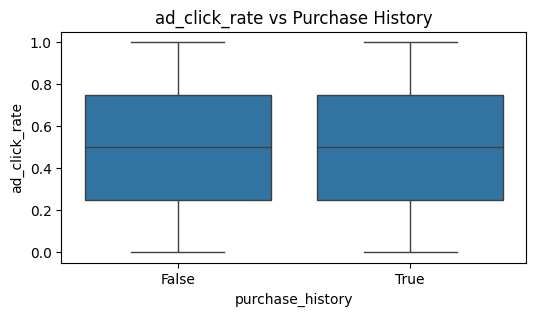

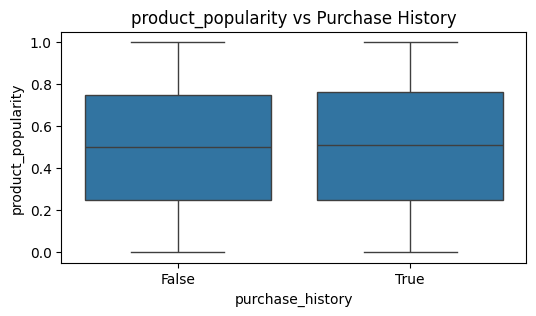

In [22]:
# Numerical --> Target
for col in num_features:
  plt.figure(figsize=(6,3))
  sns.boxplot(x="purchase_history", y = col, data = e_comm)
  plt.title(f"{col} vs Purchase History")
  plt.show()

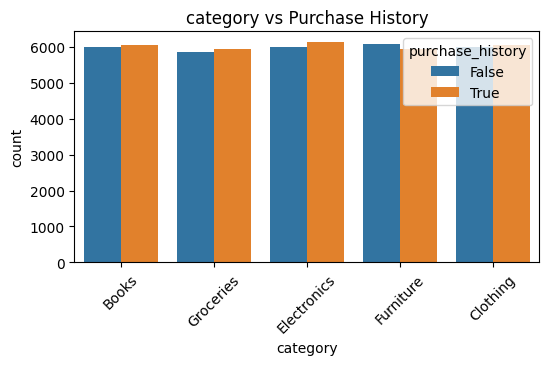

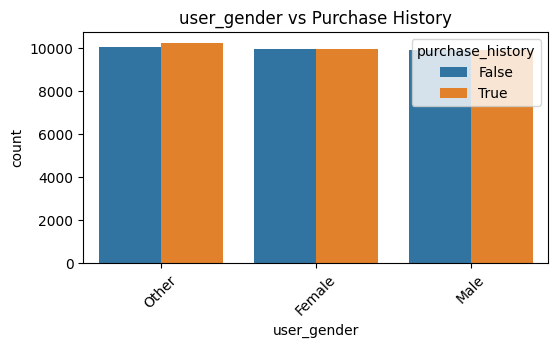

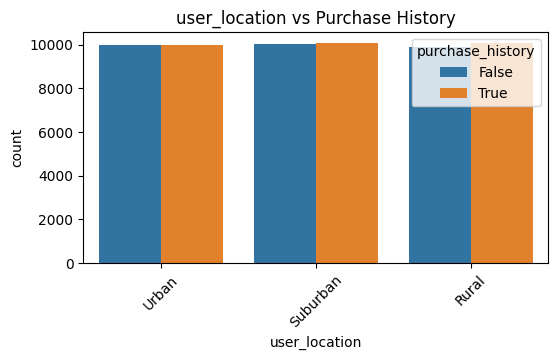

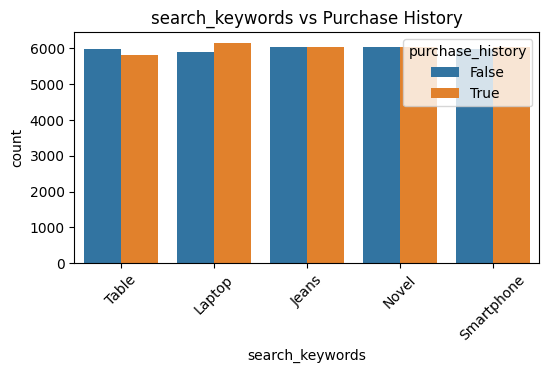

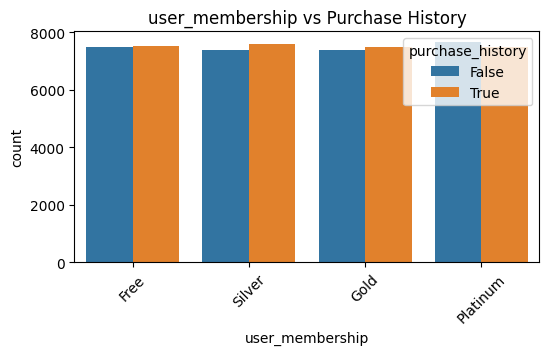

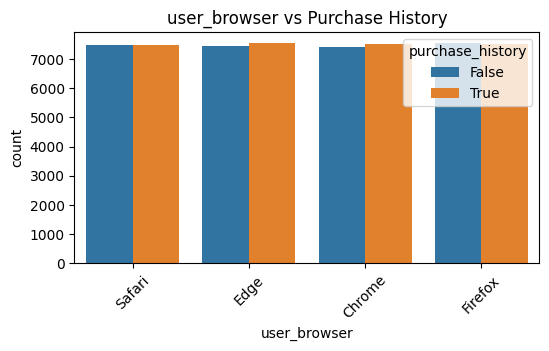

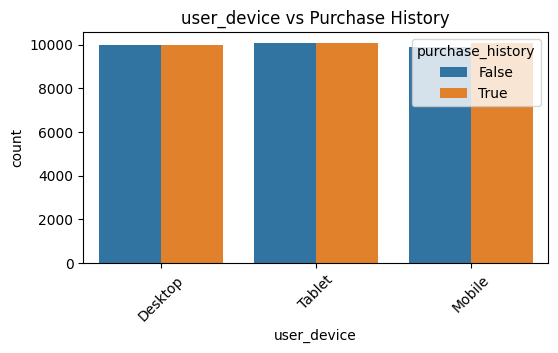

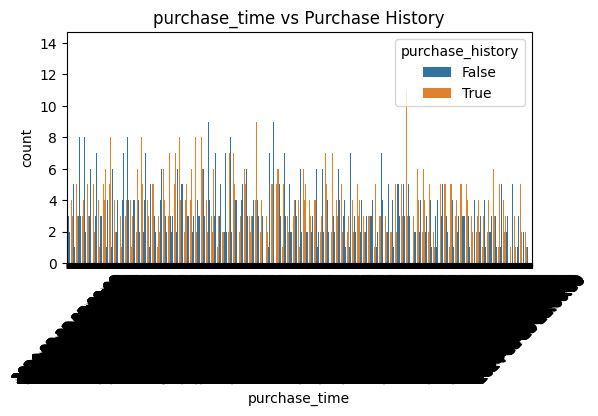

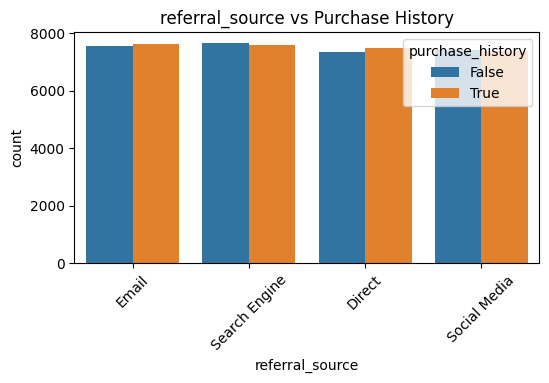

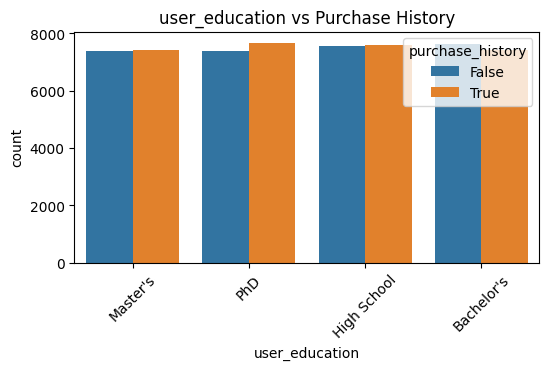

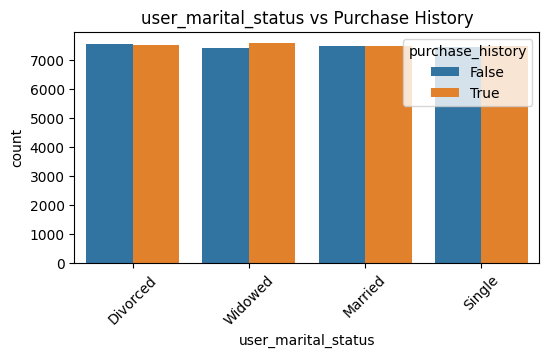

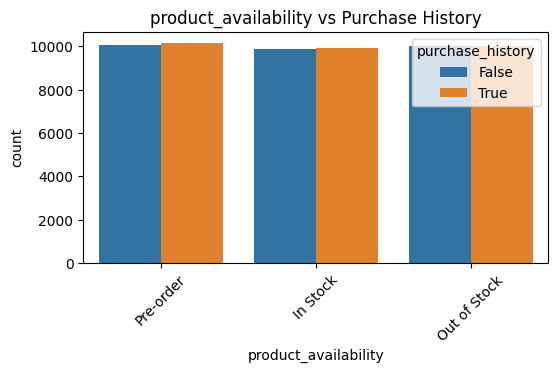

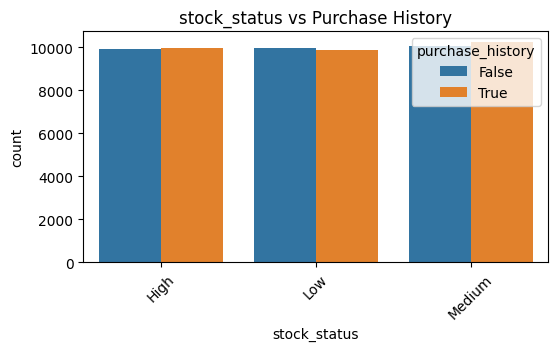

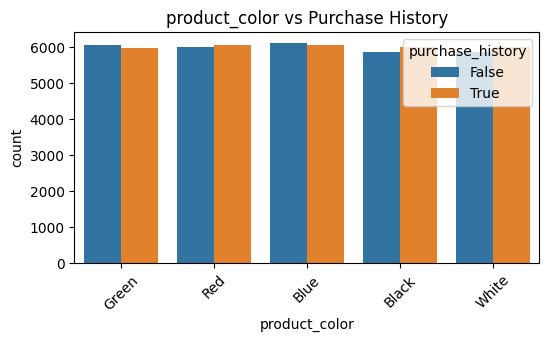

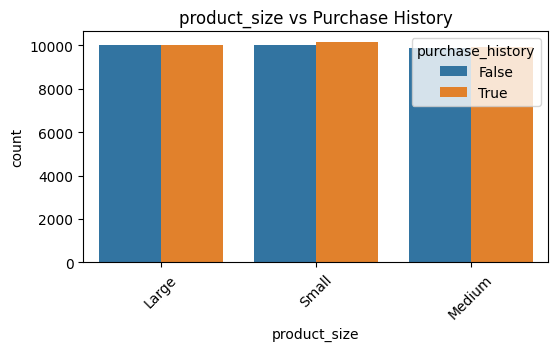

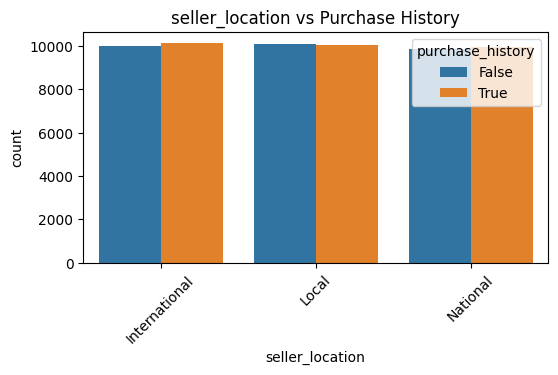

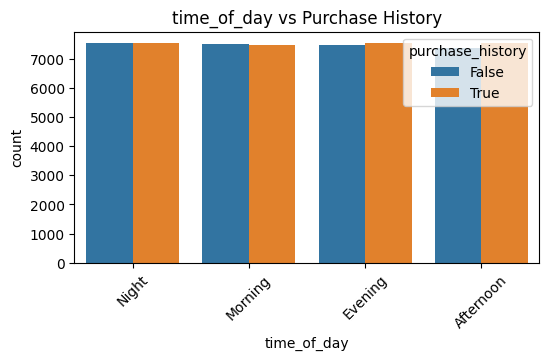

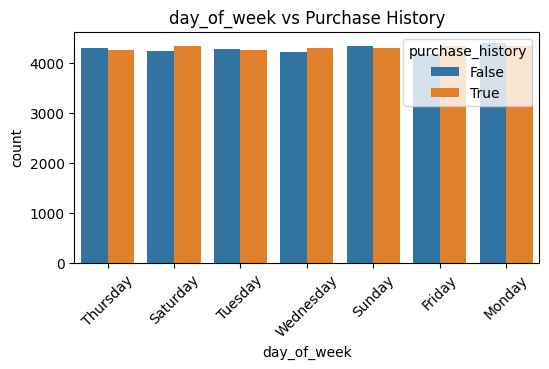

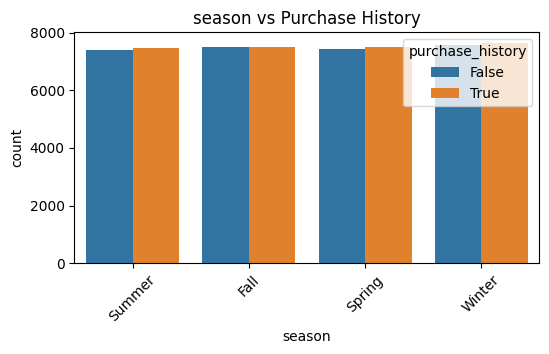

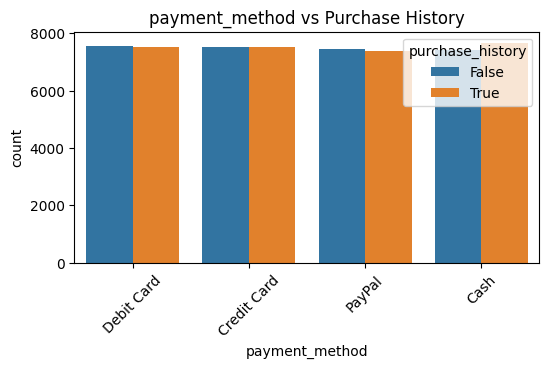

In [23]:
# Categorical ---> Target
for col in cat_features:
  plt.figure(figsize=(6,3))
  sns.countplot(x = col, hue = "purchase_history", data = e_comm)
  plt.title(f"{col} vs Purchase History")
  plt.xticks(rotation = 45)
  plt.show()

TIME BASED ANALYSIS

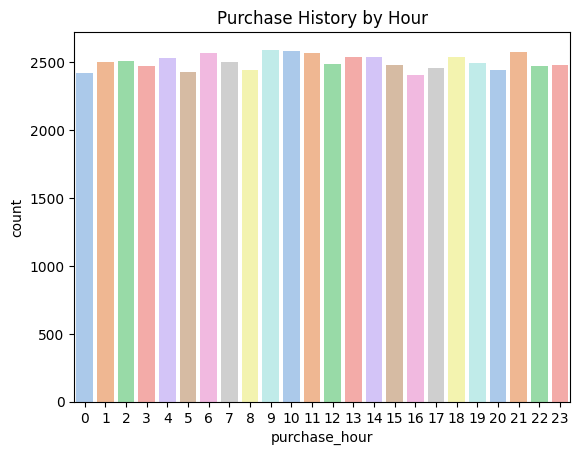

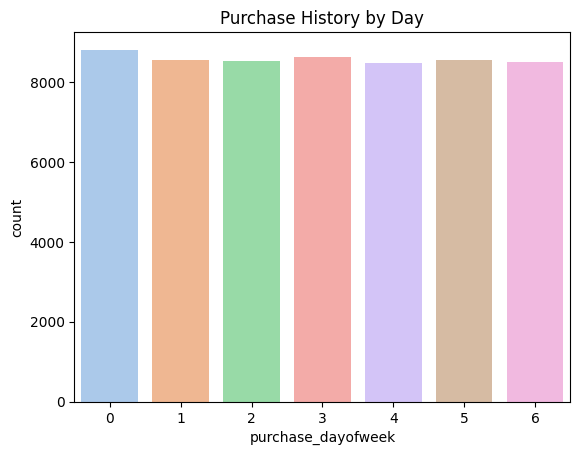

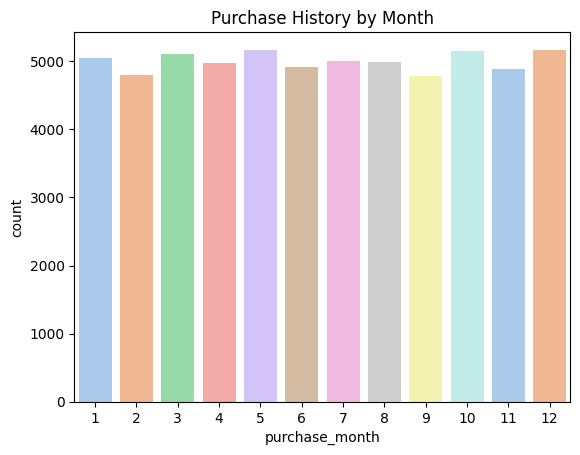

In [25]:
# To find peak shopping days/hours

# To Visualize Purchase history by hour
sns.countplot(x='purchase_hour',  data = e_comm , palette = 'pastel')
plt.title("Purchase History by Hour")
plt.show()


#To Visualize Purchase history by Day
sns.countplot(x='purchase_dayofweek',data = e_comm, palette = 'pastel')
plt.title("Purchase History by Day")
plt.show()

#To Visualize Purchase history by Month
sns.countplot(x='purchase_month',data = e_comm, palette = 'pastel')
plt.title("Purchase History by Month")
plt.show()


### RFM ANALYSIS

R -->RECENCY
"""How recently a customer purchased"""

F -->FREQUENCY
"""How often they purchase"""

M -->MONETARY
"""How much they spend"""

PREPARING DATASET FOR RFM

In [27]:
# converting purchase_time to datetime
e_comm['purchase_time'] = pd.to_datetime(e_comm['purchase_time'])

# Set analysis reference date(max date in dataset)
reference_date = e_comm['purchase_time'].max()

#Filter ony purchased transactions
purchases = e_comm[e_comm['purchase_history']==True]

COMPUTING RFM METRICS

In [30]:
# Convert purchase_time to datetime
e_comm["purchase_time"] = pd.to_datetime(e_comm["purchase_time"])
reference_date = e_comm["purchase_time"].max()

# Only purchases
purchases = e_comm[e_comm["purchase_history"] == True]

# Build RFM
rfm = purchases.groupby("user_id").agg(
    Recency = ("purchase_time", lambda x: (reference_date - x.max()).days),
    Frequency = ("purchase_time", "count"),
    Monetary = ("price", "sum")
).reset_index()

print(rfm.head())
print(rfm.columns)

   user_id  Recency  Frequency  Monetary
0        4      174          1    881.66
1        9       13          1    540.74
2       11        1          1    292.01
3       13       64          1    736.60
4       15      135          1    148.08
Index(['user_id', 'Recency', 'Frequency', 'Monetary'], dtype='object')


SCORE EACH METRIC(1-5 SCALE)

In [31]:
rfm["R_score"] = pd.qcut(rfm["Recency"].rank(method="first"), 5, labels=[5,4,3,2,1])
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_score"] = pd.qcut(rfm["Monetary"].rank(method="first"), 5, labels=[1,2,3,4,5])

rfm["RFM_Score"] = rfm[["R_score","F_score","M_score"]].sum(axis=1).astype(int)

SEGMENTATION OF CUSTOMERS

Champions (score 12–15): recent, frequent, big spenders.

Loyal (score 9–11): frequent buyers.

Potential (score 6–8): occasional buyers.

At Risk (score <6): inactive / low spenders.

In [32]:
def segment_me(x):
    if x >= 12:
        return "Champions"
    elif x >= 9:
        return "Loyal"
    elif x >= 6:
        return "Potential"
    else:
        return "At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_me)

VISUALIZE THE SEGMENTS

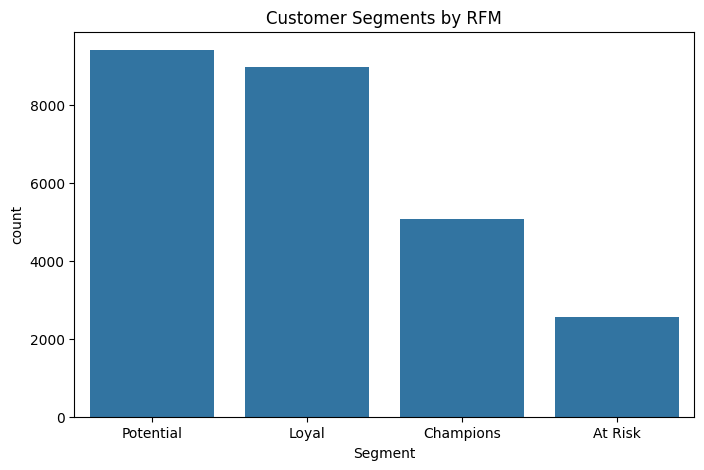

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x="Segment", data=rfm, order=rfm["Segment"].value_counts().index)
plt.title("Customer Segments by RFM")
plt.show()

## DATA PREPROCESSING

TARGET VARIABLE

In [35]:
# purchase_history ['True','False']
#To convert 0 and 1 for Logistic Regression

e_comm['purchase_history'] = e_comm['purchase_history'].astype(int)
e_comm['purchase_history']

,purchase_history
0,0
1,0
2,1
3,0
4,1
...,...
59995,0
59996,1
59997,0
59998,0


SEPARATE FEATURES AND TARGET

In [36]:
# Features (all columns except target)
X = e_comm.drop('purchase_history', axis = 1)

# Target variable
y = e_comm['purchase_history']

FEATURE SELECTION

NUMERICAL FEATURES OUT OF 51 COLUMNS TO BE CONSIDERED

These directly reflect user/product behavior → strong signals for purchase.

[
    'price','rating','review_count','user_age','time_on_page',
    'add_to_cart_count','session_duration','clicks_on_ads','page_views',
    'wishlist_additions','cart_abandonment_rate','average_spent','user_income',
    'product_return_rate','discount_percentage','time_to_purchase',
    'delivery_time','shipping_fee','seller_rating','seller_response_time',
    'review_sentiment_score','user_engagement_score','ad_click_rate',
    'product_popularity'
]


CATEGORICAL FEATURES OUT OF 51 TO BE CONSIDERED

[
    'category','user_gender','user_location','user_membership','user_browser',
    'user_device','referral_source','user_education','user_marital_status',
    'stock_status','is_top_seller','seller_location','time_of_day',
    'day_of_week','season','payment_method','coupon_used'
]

DATA PREPARATION FOR LOGISTIC REGRESSION

In [37]:
#Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [69]:
# Features
num_features = [
    'price','rating','review_count','user_age','time_on_page',
    'add_to_cart_count','session_duration','clicks_on_ads','page_views',
    'wishlist_additions','cart_abandonment_rate','average_spent','user_income',
    'product_return_rate','discount_percentage','time_to_purchase',
    'delivery_time','shipping_fee','seller_rating','seller_response_time',
    'review_sentiment_score','user_engagement_score','ad_click_rate',
    'product_popularity'
]

cat_features = [
    'category','user_gender','user_location','user_membership','user_browser',
    'user_device','referral_source','user_education','user_marital_status',
    'stock_status','is_top_seller','seller_location','time_of_day',
    'day_of_week','season','payment_method','coupon_used'
]

# Detect types again
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Extra check: if a column has string values but was detected as numeric, move it to categorical
for col in X.columns:
    if X[col].dtype == "object":
        if col not in cat_features:
            cat_features.append(col)
        if col in num_features:
            num_features.remove(col)

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

#X = e_comm[num_features + cat_features]

Numerical Features: ['price', 'rating', 'review_count', 'user_age', 'time_on_page', 'add_to_cart_count', 'session_duration', 'clicks_on_ads', 'page_views', 'wishlist_additions', 'cart_abandonment_rate', 'average_spent', 'user_income', 'product_return_rate', 'discount_percentage', 'time_to_purchase', 'delivery_time', 'shipping_fee', 'seller_rating', 'seller_response_time', 'review_sentiment_score', 'user_engagement_score', 'ad_click_rate', 'product_popularity']
Categorical Features: ['category', 'user_gender', 'user_location', 'user_membership', 'user_browser', 'user_device', 'referral_source', 'user_education', 'user_marital_status', 'stock_status', 'is_top_seller', 'seller_location', 'time_of_day', 'day_of_week', 'season', 'payment_method', 'coupon_used']


SCALE NUMERICAL AND ONEHOT CATEGORICAL

In [70]:
# Preprocessing: scale numerical + one-hot categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
    ]
)

In [71]:
# Logistic Regression pipeline
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [72]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit
log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'rating',
                                                   'review_count', 'user_age',
                                                   'time_on_page',
                                                   'add_to_cart_count',
                                                   'session_duration',
                                                   'clicks_on_ads',
                                                   'page_views',
                                                   'wishlist_additions',
                                                   'cart_abandonment_rate',
                                                   'average_spent',
                                                   'user_income',
                                                   'product_return_rate',
                                                   'discount_percentage',
                                                   'time_to_purchas...
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['category', 'user_gender',
                                                   'user_location',
                                                   'user_membership',
                                                   'user_browser',
                                                   'user_device',
                                                   'referral_source',
                                                   'user_education',
                                                   'user_marital_status',
                                                   'stock_status',
                                                   'is_top_seller',
                                                   'seller_location',
                                                   'time_of_day', 'day_of_week',
                                                   'season', 'payment_method',
                                                   'coupon_used'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

EVALUATE PERFORMANCE

In [73]:
# Importing the library
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

# Prediction
y_pred = log_reg.predict(X_test)

#Displaying the output
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.5167
Test Accuracy: 0.4981
[[4248 4726]
 [4309 4717]]
              precision    recall  f1-score   support

           0       0.50      0.47      0.48      8974
           1       0.50      0.52      0.51      9026

    accuracy                           0.50     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.50      0.50      0.50     18000



ROC_AUC

In [74]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred)
logistic_roc_auc

np.float64(0.4979844399689064)

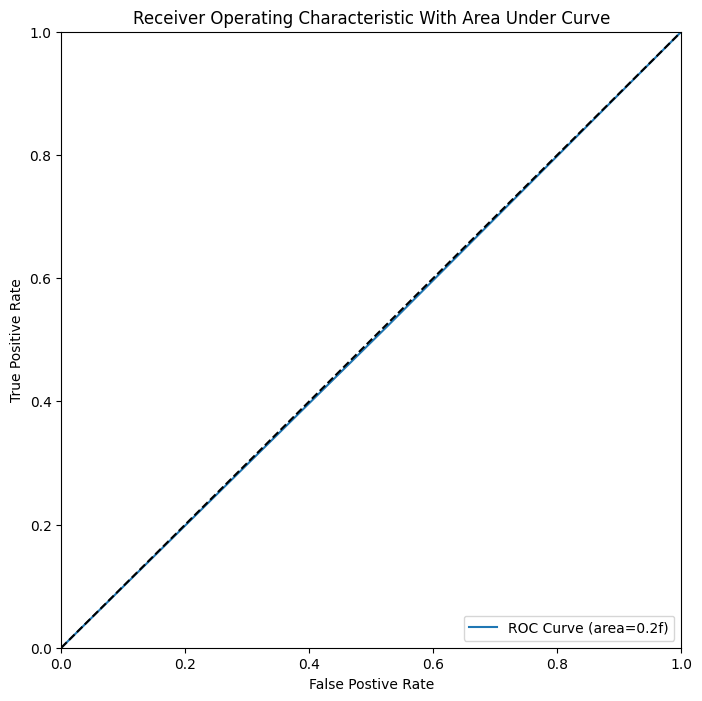

In [75]:
#Visualize roc_auc curver
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label="ROC Curve (area=0.2f)" %logistic_roc_auc)
plt.plot([0,1], [0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic With Area Under Curve")
plt.legend(loc="lower right")
plt.show()

GET FINAL FEATURE NAMES AFTER PREPROCESSING

In [76]:
# Get numeric feature names
num_features_out = num_features

# Get categorical feature names after one-hot encoding
cat_encoder = log_reg.named_steps['preprocessor'].named_transformers_['cat']
cat_features_out = cat_encoder.get_feature_names_out(cat_features)

# Combine all
all_features = list(num_features_out) + list(cat_features_out)
all_features

['price',
 'rating',
 'review_count',
 'user_age',
 'time_on_page',
 'add_to_cart_count',
 'session_duration',
 'clicks_on_ads',
 'page_views',
 'wishlist_additions',
 'cart_abandonment_rate',
 'average_spent',
 'user_income',
 'product_return_rate',
 'discount_percentage',
 'time_to_purchase',
 'delivery_time',
 'shipping_fee',
 'seller_rating',
 'seller_response_time',
 'review_sentiment_score',
 'user_engagement_score',
 'ad_click_rate',
 'product_popularity',
 'category_Clothing',
 'category_Electronics',
 'category_Furniture',
 'category_Groceries',
 'user_gender_Male',
 'user_gender_Other',
 'user_location_Suburban',
 'user_location_Urban',
 'user_membership_Gold',
 'user_membership_Platinum',
 'user_membership_Silver',
 'user_browser_Edge',
 'user_browser_Firefox',
 'user_browser_Safari',
 'user_device_Mobile',
 'user_device_Tablet',
 'referral_source_Email',
 'referral_source_Search Engine',
 'referral_source_Social Media',
 'user_education_High School',
 "user_education_Master

EXTRACT ORDER CO-EFFICIENTS AND ODD RATIOS

In [77]:
import numpy as np
import pandas as pd

# Get model coefficients
coefficients = log_reg.named_steps['classifier'].coef_[0]

# Build feature importance dataframe
feature_importance = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": coefficients,
    "Odds_Ratio": np.exp(coefficients)   # exp(coef) = odds ratio
})
# Sort by impact
feature_importance = feature_importance.sort_values(by="Odds_Ratio", ascending=False)
print(feature_importance.head(15))   # top 15 features

                        Feature  Coefficient  Odds_Ratio
34       user_membership_Silver     0.054849    1.056381
29            user_gender_Other     0.049625    1.050877
45           user_education_PhD     0.049515    1.050761
48  user_marital_status_Widowed     0.045843    1.046910
15             time_to_purchase     0.030882    1.031364
69             coupon_used_True     0.030219    1.030680
32         user_membership_Gold     0.029735    1.030182
43   user_education_High School     0.026295    1.026644
39           user_device_Tablet     0.025977    1.026317
58         day_of_week_Saturday     0.024450    1.024751
23           product_popularity     0.022468    1.022723
38           user_device_Mobile     0.022205    1.022453
19         seller_response_time     0.021487    1.021720
12                  user_income     0.020006    1.020207
44      user_education_Master's     0.020006    1.020207


VISUALIZE

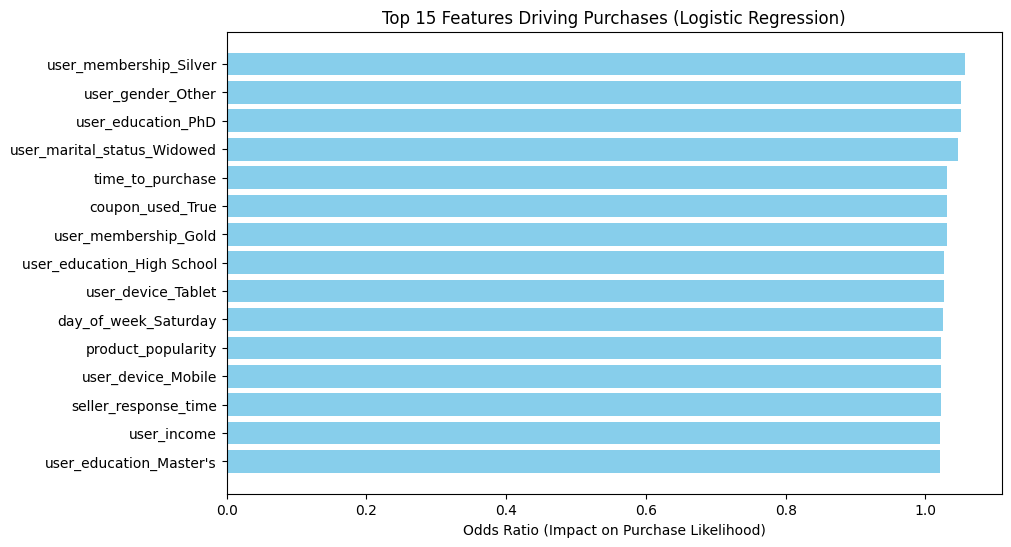

In [78]:
top_features = feature_importance.head(15)

plt.figure(figsize=(10,6))
plt.barh(top_features["Feature"], top_features["Odds_Ratio"], color="skyblue")
plt.xlabel("Odds Ratio (Impact on Purchase Likelihood)")
plt.title("Top 15 Features Driving Purchases (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()


## ADVANCED MODELS

## RANDOM FOREST CLASSIFIER

In [80]:
# Importing the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Build pipeline with preprocessing + RandomForest
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),   # same ColumnTransformer we built earlier
    ("classifier", RandomForestClassifier(random_state=42))
])

# 2. Fit the model
rf_pipeline.fit(X_train, y_train)

# 3. Predictions
y_pred_rf = rf_pipeline.predict(X_test)

# 4. Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.5049


RANDOM FOREST FEATURE IMPORTANCE

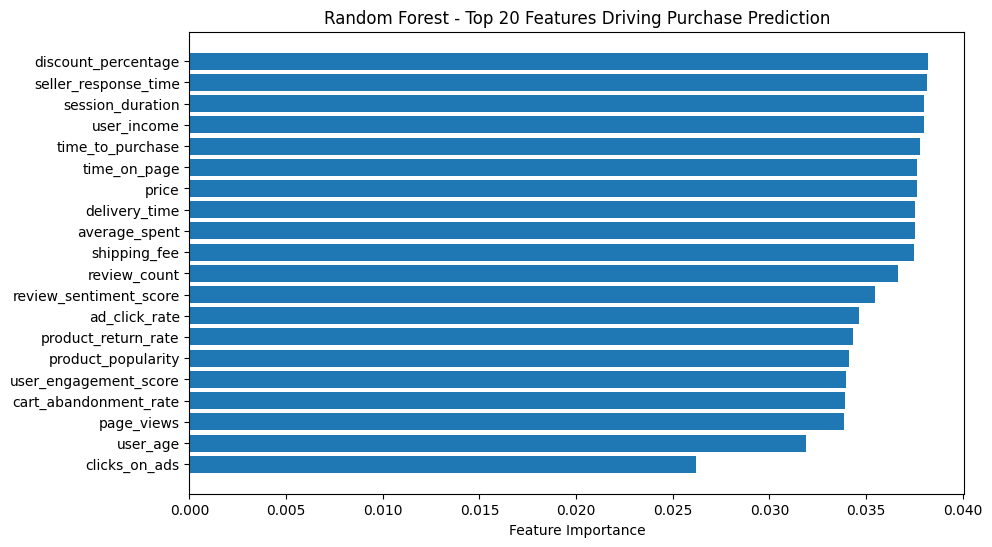

In [81]:
# 1. Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# 2. Get feature names from preprocessor
ohe = rf_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(cat_features)  # expanded categorical features

all_features = num_features + list(ohe_features)

# 3. Extract feature importances from Random Forest
importances = rf_pipeline.named_steps["classifier"].feature_importances_

# 4. Put into DataFrame
feat_importances = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# 5. Plot Top 20 Features
plt.figure(figsize=(10,6))
plt.barh(feat_importances["feature"][:20][::-1],
         feat_importances["importance"][:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Top 20 Features Driving Purchase Prediction")
plt.show()

## HYPER PARAMETER TUNING

In [85]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "classifier__n_estimators": [100, 200, 500],
    "classifier__max_depth": [5, 10, 20, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

search = RandomizedSearchCV(
    rf_pipeline, param_distributions=param_dist,
    n_iter=10, cv=3, scoring="roc_auc", n_jobs=-1, random_state=42
)

search.fit(X_train, y_train)
print("Best Params:", search.best_params_)
print("Best ROC-AUC:", search.best_score_)

Best Params: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 5}
Best ROC-AUC: 0.5080604317392475


## GRADIENTBOOSTING CLASSIFIER

In [82]:
#Importing library
from sklearn.ensemble import GradientBoostingClassifier

#Intialise the classifer
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

#Fit the model
gb_pipeline.fit(X_train, y_train)

#Predictions
y_pred_gb = gb_pipeline.predict(X_test)

#Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

Gradient Boosting Accuracy: 0.5006


DECISION TREE CLASSIFIER

Decision Tree Accuracy: 0.5042


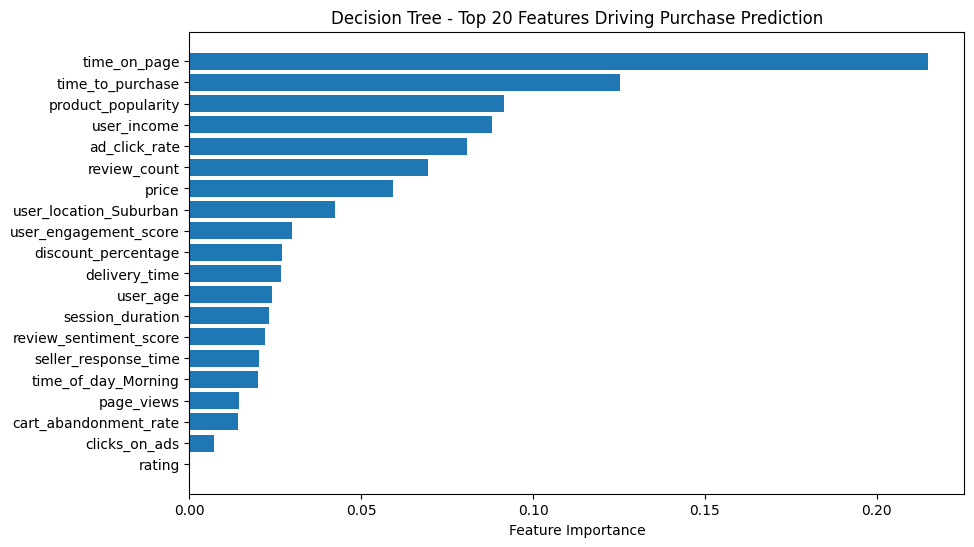

In [83]:
#Importing libraries

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

# 1. Build pipeline with Decision Tree
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42, max_depth=6))  # you can tune depth
])

# 2. Fit the model
dt_pipeline.fit(X_train, y_train)

# 3. Predictions and Accuracy
y_pred_dt = dt_pipeline.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# 4. Get feature names
ohe = dt_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(cat_features)
all_features = num_features + list(ohe_features)

# 5. Feature importances
importances = dt_pipeline.named_steps["classifier"].feature_importances_
feat_importances = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# 6. Plot Top 20 Features
plt.figure(figsize=(10,6))
plt.barh(feat_importances["feature"][:20][::-1],
         feat_importances["importance"][:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Decision Tree - Top 20 Features Driving Purchase Prediction")
plt.show()

VISUALIZE DECISION TREE

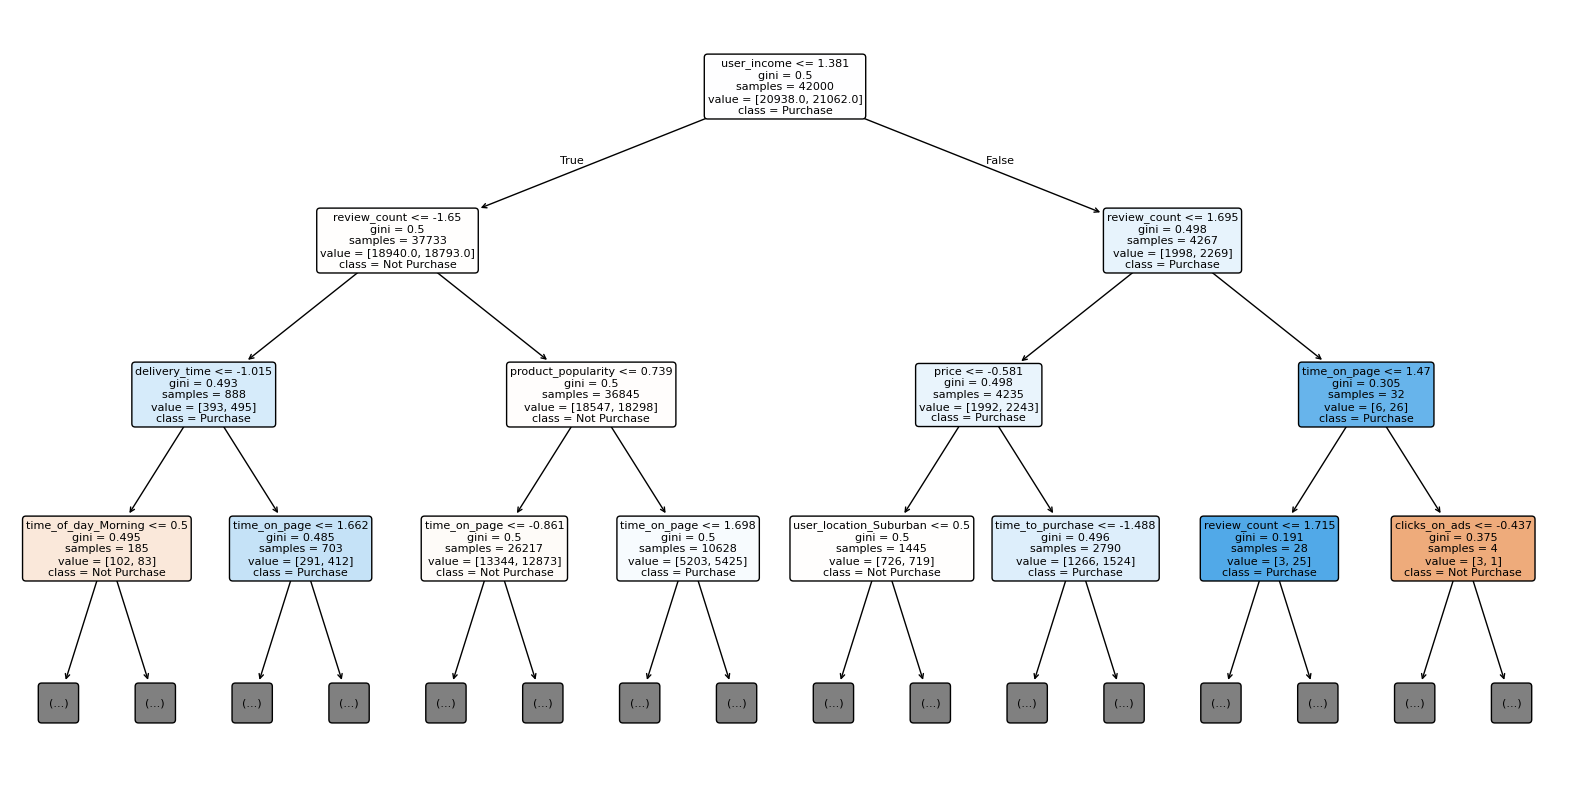

In [84]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract trained Decision Tree model
dt_model = dt_pipeline.named_steps["classifier"]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=all_features,   # names after preprocessing
    class_names=["Not Purchase", "Purchase"],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3   # only show top 3 levels (for readability)
)
plt.show()